In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os

## Import Data

In [7]:
train_csv = os.path.abspath(os.path.join(os.getcwd(), '..', 'data','train.csv'))
train = pd.read_csv(train_csv)

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Analysis

First we study feature's type

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Univariate Analysis

1. Explore variable one by one
2. Choose the method based on variable type (Numerical or Categorical)

### Continuos variable analysis

- Measure of central tendency of the variable (Mean, Median, Mode)
- Measure of spread of the variable (Variance, Standard Deviation)
- Measure of the shape (is Symmetrical? Asymmetrical? In last case what is the skewed and kurtosis?)

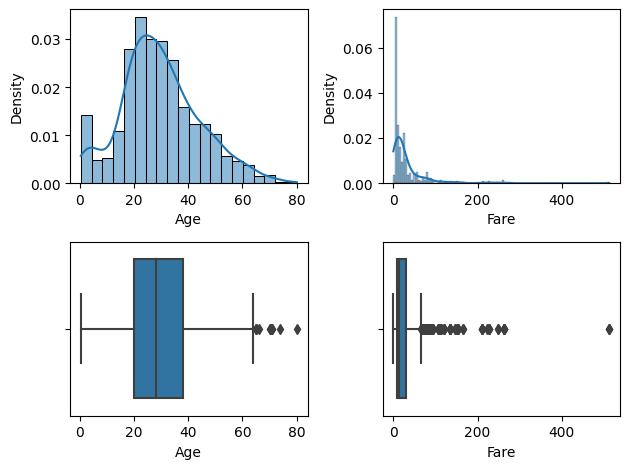

In [34]:
fig, axis = plt.subplots(2, 2)
continuos_features = ["Age", "Fare"]
for idx, feature  in enumerate(continuos_features):
    sb.histplot(data=train[feature], kde=True, stat='density', ax=axis[0][idx%2])
    sb.boxplot(x=feature, data=train, ax=axis[1][idx%2])

fig.tight_layout()
plt.show()

### Categorical variable analysis 

We study this type of variable with frequency distribution (Like BarChart).

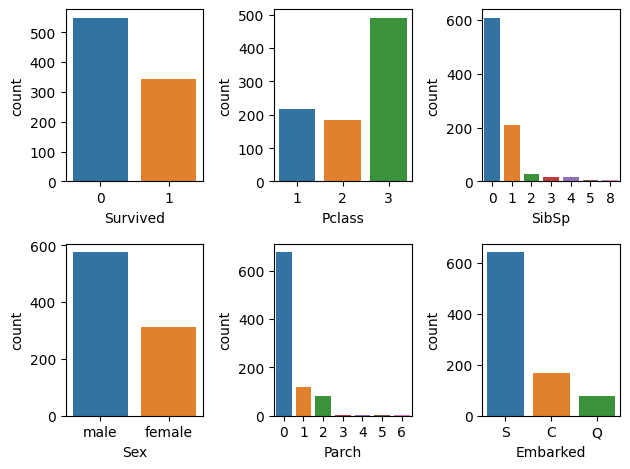

In [30]:
fig, axis = plt.subplots(2, 3)
categorical_features = ["Survived", "Pclass", "SibSp", "Sex", "Parch", "Embarked"]
for idx, feature  in enumerate(categorical_features):
    sb.countplot(x=feature, data=train, ax=axis[idx//3][idx%3])

fig.tight_layout()
plt.show()

## Bi-variate Analysis

- We use bi-variate analysis with two variables(dependets/independent) for any combination
- The combination can be: 
    - Categorical/Categorical
    - Categorical/Continuos
    - Continuos/Continous

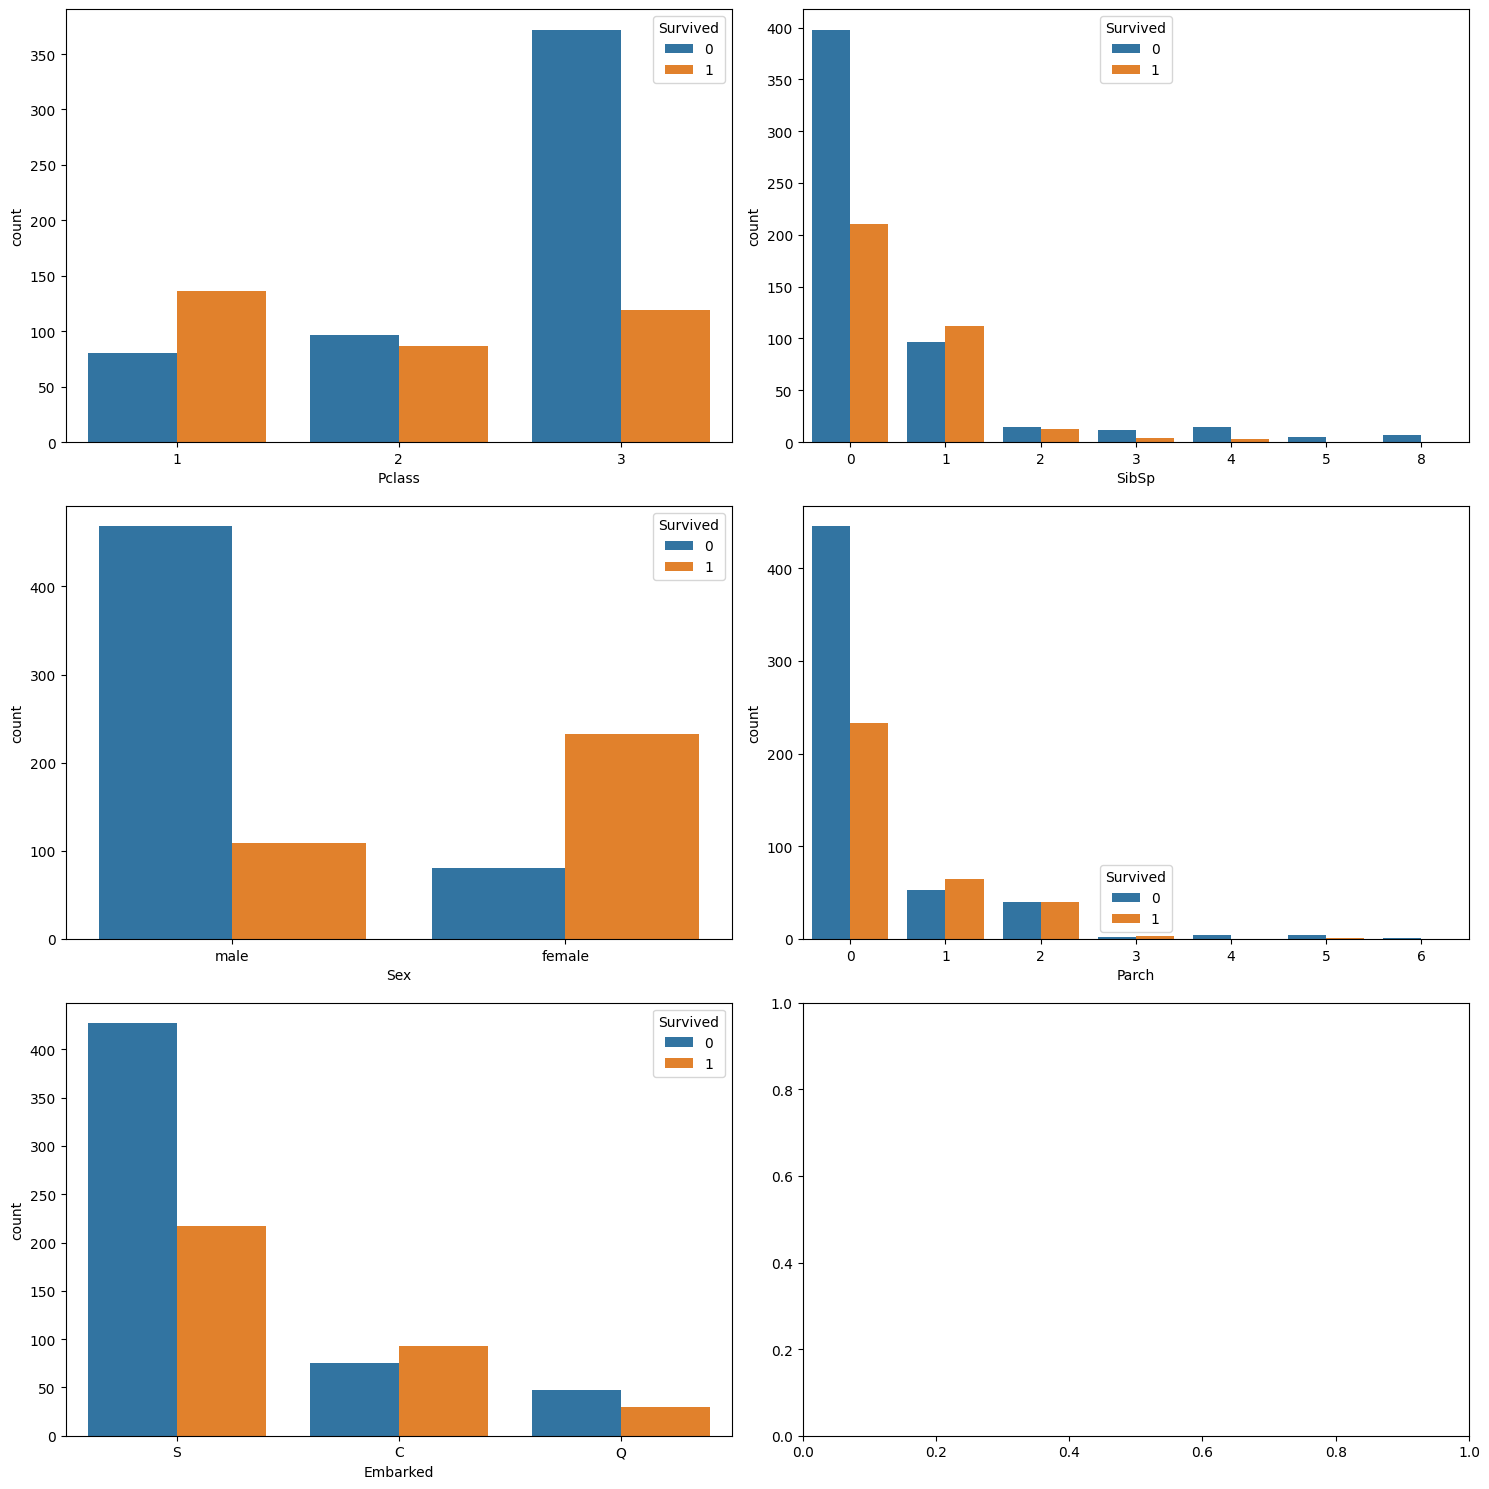

In [56]:
fig, axis = plt.subplots(3, 2, figsize=(15, 15))
categorical_features = ["Pclass", "SibSp", "Sex", "Parch", "Embarked"]
continuos_features = ["Age", "Fare"]
output = "Survived"

for idx, feature  in enumerate(categorical_features):
    sb.countplot(x=feature, hue=output, data=train, ax=axis[idx//2][idx%2])

fig.tight_layout()
plt.show()

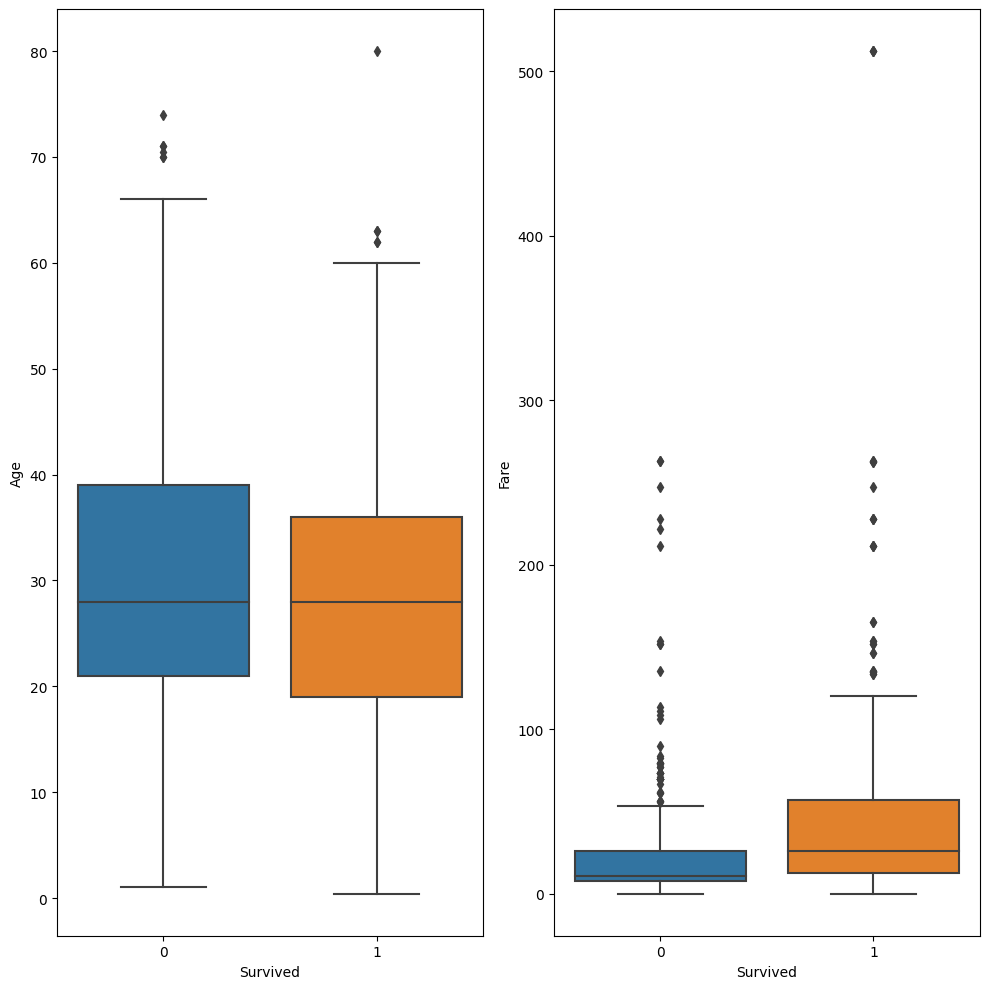

In [58]:
fig, axis = plt.subplots(1, 2, figsize=(10, 10))
continuos_features = ["Age", "Fare"]
output = "Survived"

for idx, feature  in enumerate(continuos_features):
    sb.boxplot(y=feature, x=output, data=train, orient="v", ax=axis[idx%2])

fig.tight_layout()
plt.show()

## Multivariate Analysis

### Missing values

Check how many missing values are present

In [40]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(4)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
